In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [23]:
df=pd.read_csv("Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


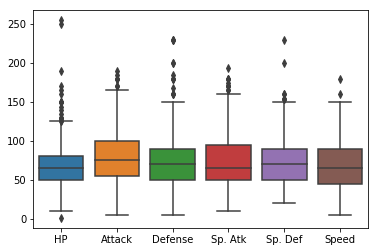

In [27]:
plt.figure()
sns.boxplot(data=df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']])

In [7]:
pd.DataFrame(df['Type 1'].value_counts())

,Type 1
Water,112
Normal,98
Grass,70
Bug,69
Psychic,57
Fire,52
Rock,44
Electric,44
Dragon,32
Ghost,32


In [24]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

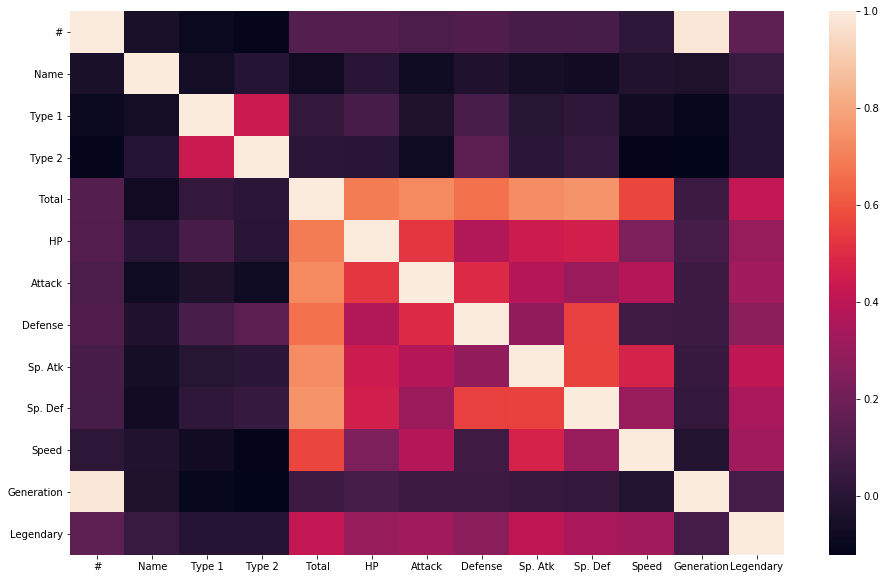

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())

In [14]:
df["Legendary"].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [15]:
df["Type 1"].value_counts()

17    112
12     98
9      70
0      69
14     57
6      52
15     44
3      44
10     32
2      32
8      32
1      31
13     28
16     27
5      27
11     24
4      17
7       4
Name: Type 1, dtype: int64

In [16]:
#droppinghte columns that has significant contribution in the predictions
df=df.drop('Type 1',axis=1)
df=df.drop('Type 2',axis=1)


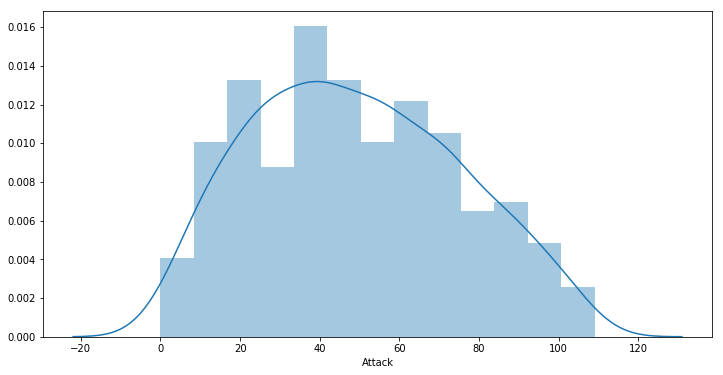

In [17]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Legendary']==False].Attack)

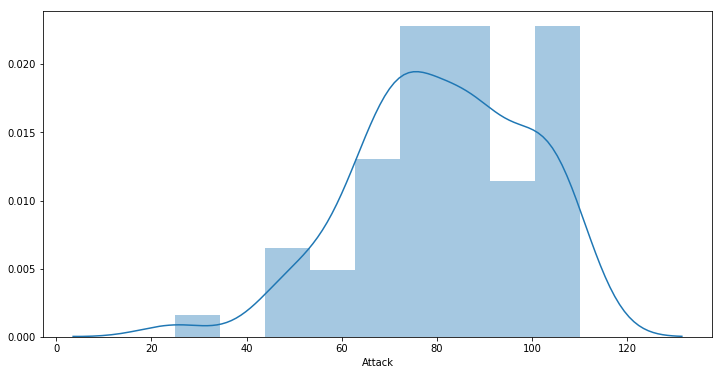

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['Legendary']==True].Attack)

In [12]:
from sklearn.preprocessing import LabelEncoder
# replacing all the NAN values with last valid observation forward to next valid observation
df=df.fillna(method='pad',axis=1)

# assigning labels to the data
labelEncoder =LabelEncoder()
for col in df.columns:
    df[col] = labelEncoder.fit_transform(df[col])

In [19]:
#dropping the output data from given input
X = df.drop('Legendary', axis=1)

#output required
y = df['Legendary']

#splitting the data into training and testing parts
split=int(0.8*df.shape[0])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#print (X_train.shape)

In [20]:
#making decision trees with help of sklearn package
dt = DecisionTreeClassifier(max_depth=10)

#fitting the training data
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
#checking the accracy score for the testing parts of the data
dt.score(X_test,y_test)

0.96250000000000002

In [28]:
pd.get_dummies?

In [30]:
sns.pairplot?